In [7]:
#load Dataset and import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('ifood_df.csv')
df=pd.DataFrame(data)
print(df.head())
print(df.info())
print(df.shape)
print(df.columns)




    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

In [8]:
#Data Cleaning
print(df.isnull().sum().sum())
df.dropna()
print(df.describe())

0
              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.00000

           Recency  Total_Purchase  Total_Spent
count  2205.000000     2205.000000  2205.000000
mean     49.009070       12.569615   606.821769
std      28.932111        7.180350   601.675284
min       0.000000        0.000000     5.000000
25%      24.000000        6.000000    69.000000
50%      49.000000       12.000000   397.000000
75%      74.000000       18.000000  1047.000000
max      99.000000       32.000000  2525.000000


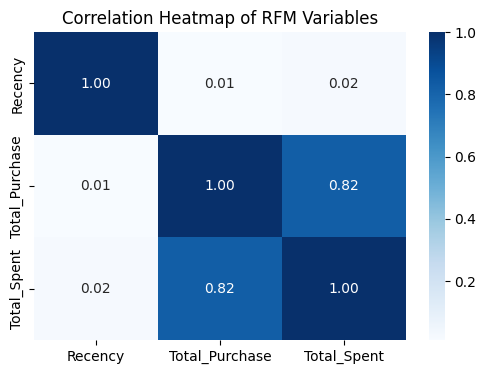

In [15]:
# Combine multiple monetary columns if needed

df['Total_Spent'] = (
    df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
)

# Create total purchase count (frequency)
df['Total_Purchase']=(df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])
rfm = df[['Recency', 'Total_Purchase', 'Total_Spent']]
print(rfm.describe())

plt.figure(figsize=(6,4))
sns.heatmap(rfm.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap of RFM Variables')
plt.show()

In [16]:
#normlization
rfm_norm = (rfm - rfm.min()) / (rfm.max() - rfm.min())
print(rfm_norm.head())

    Recency  Total_Purchase  Total_Spent
0  0.585859          0.6875     0.639683
1  0.383838          0.1250     0.008730
2  0.262626          0.6250     0.305952
3  0.262626          0.1875     0.019048
4  0.949495          0.4375     0.165476


In [18]:
#Manual Clustering

rfm_norm['R_Segment'] = pd.qcut(rfm_norm['Recency'], 3, labels=[3, 2, 1])  # lower recency = better
rfm_norm['F_Segment'] = pd.qcut(rfm_norm['Total_Purchase'], 3, labels=[1, 2, 3])
rfm_norm['M_Segment'] = pd.qcut(rfm_norm['Total_Spent'], 3, labels=[1, 2, 3])

# Combine into overall segment score
rfm_norm['RFM_Score'] = (
    rfm_norm['R_Segment'].astype(int) +
    rfm_norm['F_Segment'].astype(int) +
    rfm_norm['M_Segment'].astype(int)
)

# Define customer segments
rfm_norm['Customer_Segment'] = pd.cut(
    rfm_norm['RFM_Score'],
    bins=[2, 5, 7, 9],
    labels=['Low Value', 'Mid Value', 'High Value']
)

print(rfm_norm['Customer_Segment'].value_counts())

Customer_Segment
Low Value     954
Mid Value     774
High Value    477
Name: count, dtype: int64


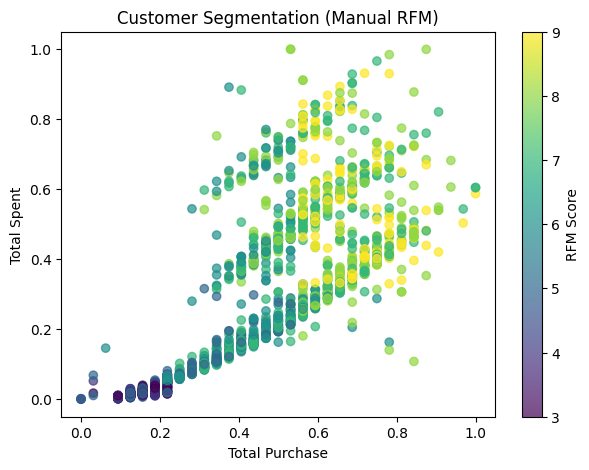

In [21]:
#visualization
plt.figure(figsize=(7,5))
plt.scatter(rfm_norm['Total_Purchase'], rfm_norm['Total_Spent'],
            c=rfm_norm['RFM_Score'], cmap='viridis', alpha=0.7)
plt.colorbar(label='RFM Score')
plt.xlabel('Total Purchase')
plt.ylabel('Total Spent')
plt.title('Customer Segmentation (Manual RFM)')
plt.show()

In [ ]:
#Insights and Recommendations

#You’ll interpret results like this:

#<High Value Segment: Low Recency (recent buyers), High Spending, High Frequency — best customers.

#<Mid Value Segment: Moderate engagement — can be converted into loyal customers.

#<Low Value Segment: Rarely purchase, low spend — need reactivation offers.